# 예측 결과 분석

In [1]:
import pandas as pd
from prediction_analysis import PredictionAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 본인 predictions.json 경로로 대체하기!
file_path = "/opt/ml/mrc-level2-nlp-05/models/exp004_klue_bert_base/predictions.json"

# val set과 predictions.json을 합치고, columns 정리
ap = PredictionAnalysis(file_path)
df = ap.df_merged
df.head()

,id,title,context,question,document_id,answer_start,answer_text,prediction,correct
0,mrc-0-003264,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,9027,284,한보철강,서울지방법원 민사합의17부,False
1,mrc-0-004762,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,51765,146,1871년,1868년,False
2,mrc-1-001810,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,15694,517,나뭇잎,나뭇잎,True
3,mrc-1-000219,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,59536,1109,금대야,화살,False
4,mrc-1-000285,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,32991,386,수평적 관계,수평적 관계,True


## 예측의 정답 여부에 대해 질문, 정답, 예측 길이 분석

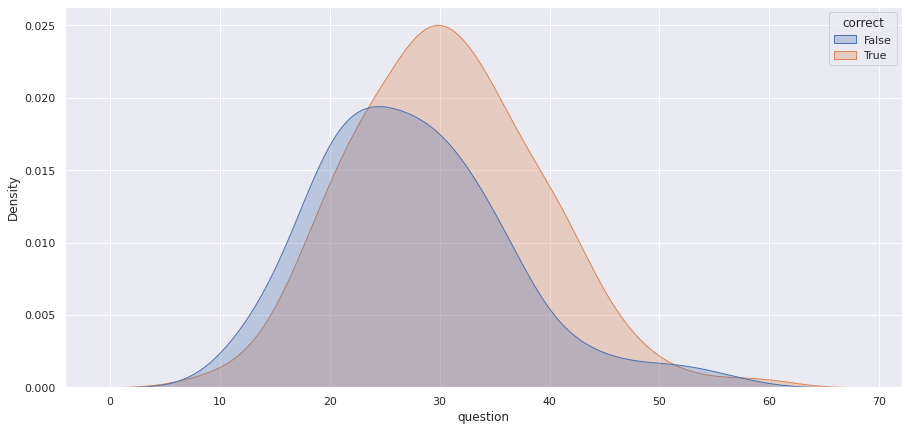

In [3]:
sns.set(rc={'figure.figsize':(15,7)})

# 질문 길이 (kdeplot)
sns.kdeplot(x=df["question"].apply(len), hue=df["correct"].apply(str), data=df, alpha=.3, fill=True)
plt.show()

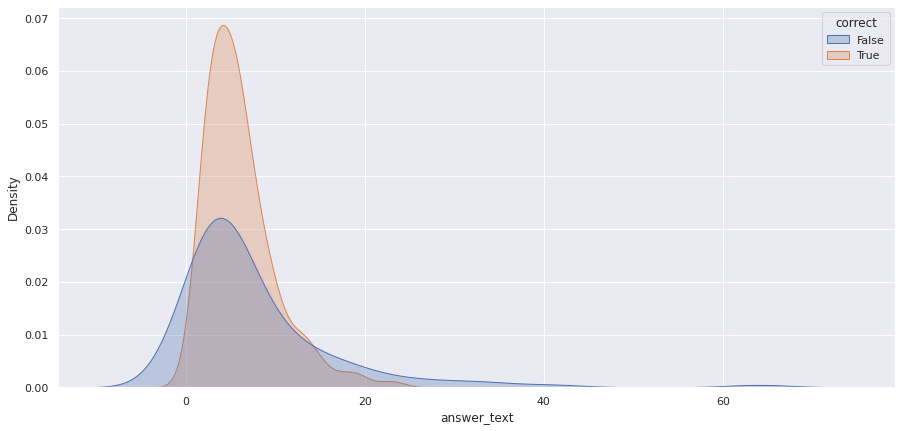

In [4]:
# 정답 길이 (kdeplot)
sns.kdeplot(x=df["answer_text"].apply(len), hue=df["correct"].apply(str), data=df, alpha=.3, fill=True)
plt.show()

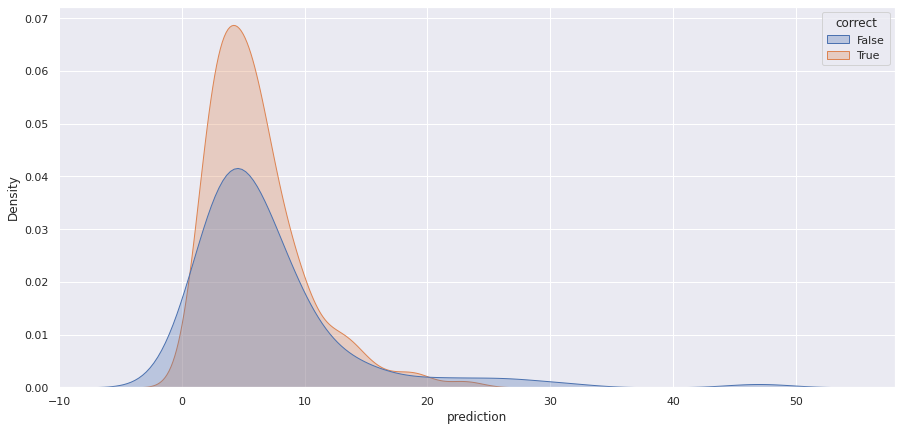

In [5]:
# 예측 답변 길이 (kdeplot)
sns.kdeplot(x=df["prediction"].apply(len), hue=df["correct"].apply(str), data=df, alpha=.3, fill=True)
plt.show()

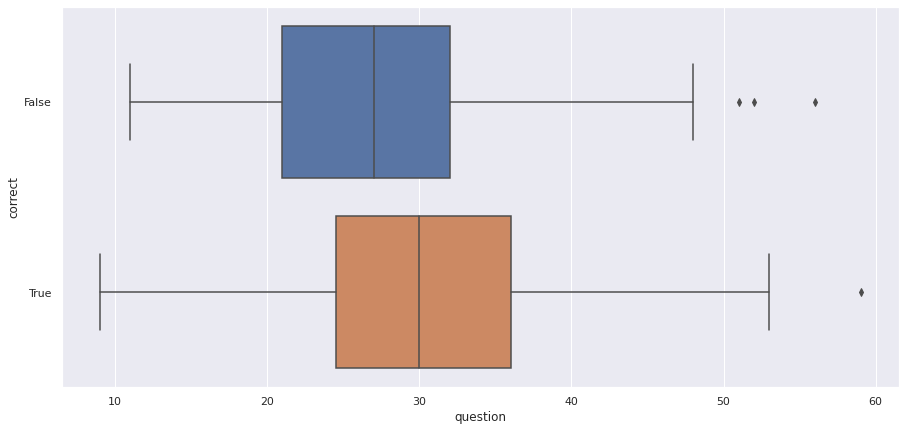

In [6]:
# 질문 길이 (boxplot)
sns.boxplot(x=df["question"].apply(len), y=df["correct"].apply(str), data=df)
plt.show()

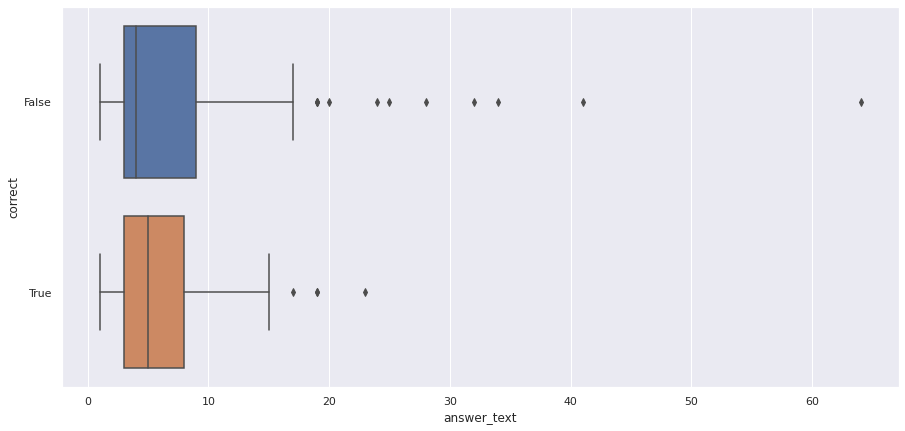

In [7]:
# 정답 길이 (boxplot)
sns.boxplot(x=df["answer_text"].apply(len), y=df["correct"].apply(str), data=df)
plt.show()

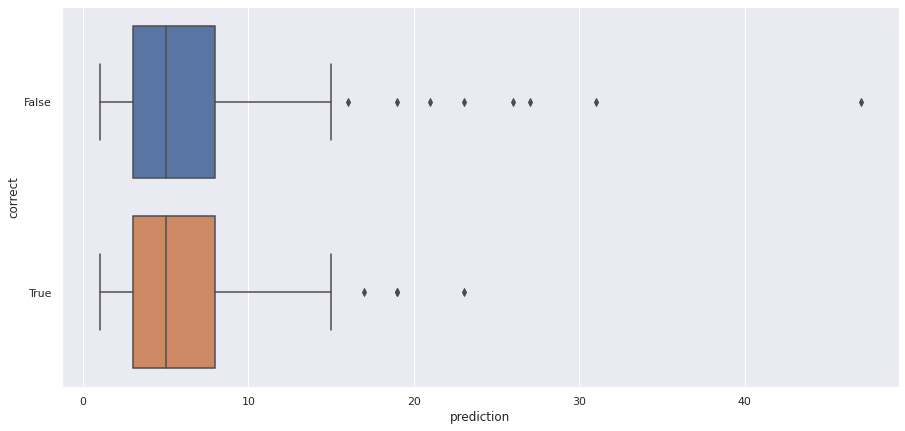

In [8]:
# 예측 답변 길이 (boxplot)
sns.boxplot(x=df["prediction"].apply(len), y=df["correct"].apply(str), data=df)
plt.show()

## 실제 정답과 예측 답변의 길이 비교
- 예측한 답변의 길이가 대체적으로 실제 정답의 길이보다 짧은 것을 확인할 수 있다.

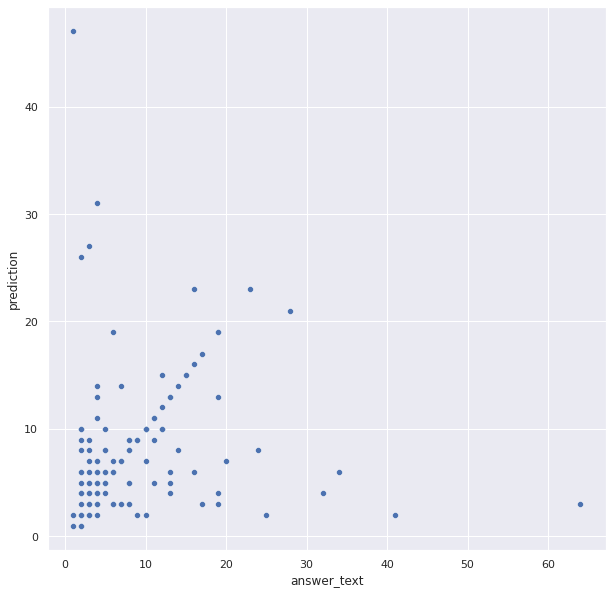

In [9]:
sns.set(rc={'figure.figsize':(10,10)})

sns.scatterplot(
    x=df["answer_text"].apply(len),
    y=df["prediction"].apply(len),
    # hue=df["correct"].apply(str),
    data=df
)
plt.show()

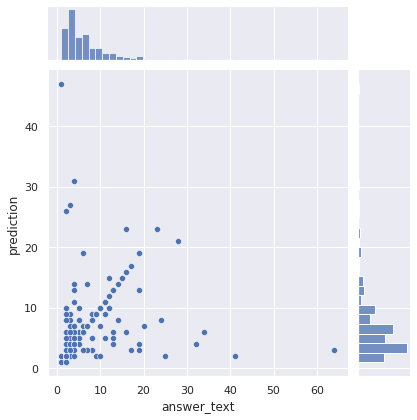

In [10]:
sns.set(rc={'figure.figsize':(20,20)})

sns.jointplot(
    x=df["answer_text"].apply(len),
    y=df["prediction"].apply(len),
    # hue=df["correct"].apply(str),
    data=df
)
plt.show()

In [11]:
# 오답이지만 정답과 길이는 동일한 데이터 추출 -> 13개 (약 5%)
df.loc[(df["answer_text"].apply(len) == df["prediction"].apply(len)) & (df["correct"]==False), :]

,id,title,context,question,document_id,answer_start,answer_text,prediction,correct
1,mrc-0-004762,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,51765,146,1871년,1868년,False
8,mrc-0-002875,노트르담 다리,예부터 노트르담 다리는 큰 다리(Grand-pont)라고 불리면서 센 강을 가로지르...,루이 14세의 왕비 마리아 테래사는 어느 나라 공주인가?,13804,625,스페인,프랑스,False
15,mrc-1-000724,1965년 캐나다 연방 선거,"1965년 캐나다 연방 선거는 캐나다에서 27번째로 치러진 연방 선거로, 캐나다 하...",피어슨이 다시 의회를 해산했던 년도는?,56403,0,1965년,1963년,False
34,mrc-0-001022,돈 칭자오,;돈 칭자오(통칭 '송곳의 칭자오')\n팔보수군의 12대 두령. 30년 前 현상금은...,칭자오의 머리가 엄청난 위력을 발휘할 수 없게 된 것은 누구 때문인가?,53318,192,몽키 D. 가프,루피의 할아버지,False
36,mrc-0-001807,류한욱,평안북도 철산군 부서면에서 소작농의 외아들로 태어났다. 어릴 때 어머니를 여의고 아...,류한욱이 두 번째 뇌출혈로 쓰러진 공간은?,16998,540,광주교도소,대전교도소,False
41,mrc-1-000753,브루투스 (트로이아),몬머스의 제프리의 《브리타니아 열왕사》에 나오는 브루투스 이야기는 《브리튼인의 역사...,브루투스가 세운도시의 현재 이름은?,44222,1424,런던,콘월,False
53,mrc-0-002247,거창 둔마리 벽화 고분,동서 석실의 각 벽에는 회칠을 한 뒤에 벽화를 그렸는데 그 내용은 천녀상(天女像)과...,벽에 천녀를 그리기 전에 하는 밑작업은?,27499,13,회칠,벽화,False
63,mrc-0-004342,갈라파고스 제도,"비록 적도에 위치하고 있기는 하지만, 훔볼트 해류의 영향으로 차가운 바닷물을 섬 주...",갈라파고스 제도의 9월 날씨에 무엇이 계속 오는가?,7509,231,가루아,가랑비,False
92,mrc-0-000905,고려 태조,신라는 왕건에게 호의를 보였다. 왕건이 신라에서 반란을 일으키지 않았다는 점과 신라...,견훤에게 살해당한 인물과 함께 태조를 대접한 왕은?,5173,209,경순왕,경애왕,False
103,mrc-1-001522,주이 (삼국지),"아버지 주환이 고위 관료였기 때문에, 낭(郞)에 서임되었다. 기도위가 되어, 주환의...",주이로부터 문흠의 가짜 항복 소식을 들은 인물은?,27471,459,손권,손침,False


- id: 34의 "몽키 D. 가프"와 "루피의 할아버지"는 의미가 같은 단어지만 오답으로 처리됨